🚀 Deep Learning Hands-On: Convolutional Neural Networks with MNIST in PyTorch

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.functional import F

Loading the MNIST Dataset 📚

In [10]:
# TODO: Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
# TODO: Load MNIST dataset (You can fetch that from our previous project =) )
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

Building Our Convolutional Neural Network (CNN) 🏗️

In [7]:
# TODO: complete this definition of CNN
# A convolution layer in pytorch is defined with these parameters:
# input channel (if RGB = 3, if grayscaled = 1), output channel (usually 16,32,64 ), kernel size (3,5,7), stride (use 1)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #input =1, 28, 28
        self.conv1 = nn.Conv2d(1, 16, 3)  # (16, 26, 26)-->(16, 13, 13) #(input_nb_channels=1,out_channels=16,kernel_size=3,stride=1)  #First conv layer
        self.conv2 = nn.Conv2d(16, 32, 3) # (32, 11, 11)-->(32, 5, 5)   #(input_nb_channels=16,out_channels=32,kernel_size=3,stride=1) #Second conv layer
        self.fc1 = nn.Linear(32*5*5, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)                    # add pooling layer  (pytorch doc is your friend)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)                      # add pooling layer
        x = x.view(-1, 32*5*5)
        x = self.fc1(x)
        return x

    def extract_features(self, x):
        x1 = F.relu(self.conv1(x))
        x2 = F.max_pool2d(x1, kernel_size=2, stride=2)                       # add pooling layer  (pytorch doc is your friend)
        x3 = F.relu(self.conv2(x2))
        x4 = F.max_pool2d(x3, kernel_size=2, stride=2)                         # add pooling layer
        x5 = x4.view(-1, 32*5*5)
        x6 = self.fc1(x5)
        return x1, x3

model = CNN()

Training the Convolutional Neural Network 🏋️‍♂️

In [4]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_accuracy = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

In [5]:
import matplotlib.pyplot as plt
# This function plots the model complexity graph
def plot_model_complexity_graph(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

Epoch 1/30, Train Loss: 0.7877, Validation Loss: 0.3223, Train Accuracy: 0.7923, Validation Accuracy: 0.9009
Epoch 2/30, Train Loss: 0.2523, Validation Loss: 0.1873, Train Accuracy: 0.9261, Validation Accuracy: 0.9476
Epoch 3/30, Train Loss: 0.1676, Validation Loss: 0.1321, Train Accuracy: 0.9513, Validation Accuracy: 0.9639
Epoch 4/30, Train Loss: 0.1266, Validation Loss: 0.1032, Train Accuracy: 0.9635, Validation Accuracy: 0.9700
Epoch 5/30, Train Loss: 0.1052, Validation Loss: 0.0924, Train Accuracy: 0.9688, Validation Accuracy: 0.9726
Epoch 6/30, Train Loss: 0.0921, Validation Loss: 0.0791, Train Accuracy: 0.9730, Validation Accuracy: 0.9752
Epoch 7/30, Train Loss: 0.0830, Validation Loss: 0.0750, Train Accuracy: 0.9751, Validation Accuracy: 0.9761
Epoch 8/30, Train Loss: 0.0765, Validation Loss: 0.0675, Train Accuracy: 0.9771, Validation Accuracy: 0.9787
Epoch 9/30, Train Loss: 0.0716, Validation Loss: 0.0657, Train Accuracy: 0.9781, Validation Accuracy: 0.9785
Epoch 10/30, Train 

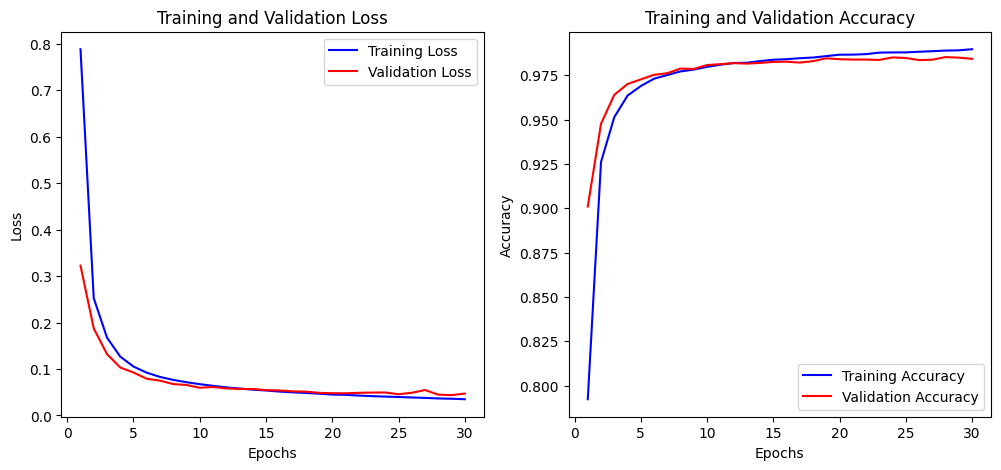

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# run the two functions
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    # put here the arguments for the training function
    model, train_loader, test_loader, criterion, optimizer, epochs=30
)

plot_model_complexity_graph(train_losses, val_losses, train_accuracies, val_accuracies)

Visualizing the Learned Features of the CNN 🔍

In [11]:
import matplotlib.pyplot as plt

def visualize_feature_maps(model, image, layer_num):
    model.eval()
    with torch.no_grad():
        conv1_output, conv2_output = model.extract_features(image.unsqueeze(0))

    if layer_num == 1:
        layer_output = conv1_output
    elif layer_num == 2:
        layer_output = conv2_output
    else:
        raise ValueError("Invalid layer number")

    layer_output = layer_output.squeeze(0).cpu()

    fig, axes = plt.subplots(1, layer_output.size(0), figsize=(20, 2))
    for i, ax in enumerate(axes):
        ax.imshow(layer_output[i].detach().numpy(), cmap='gray')
        ax.axis('off')
    plt.show()

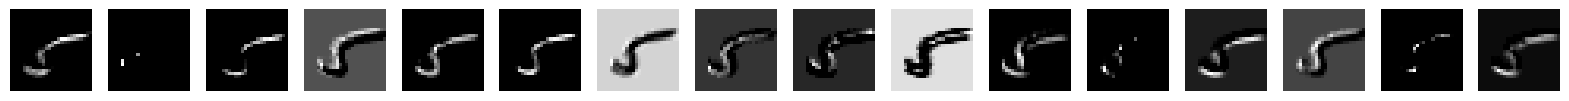

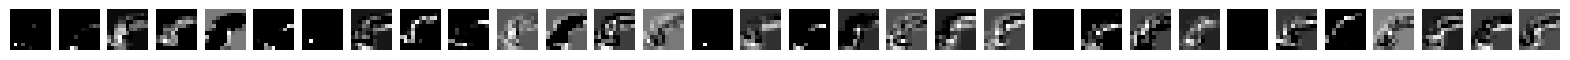

In [12]:
# TODO: try different images and compare the result
# Load a sample image from the dataset
sample_image, _ = next(iter(test_loader))
sample_image = sample_image[1]  # Get the first image in the batch

# Visualize feature maps for the first convolutional layer
visualize_feature_maps(model, sample_image, layer_num=1)

# Visualize feature maps for the second convolutional layer
visualize_feature_maps(model, sample_image, layer_num=2)